<a href="https://colab.research.google.com/github/Starias22/Big-Data-News-Recommender/blob/main/Lab3_Kafka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I. Kafka Architecture

Kafka is a streaming platform that get data between systems or applications. Also it allows the building of real-time streaming applications that transform or react to the streams of data.

Kafka is run as a cluster on one or more servers that can span multiple datacenters. The Kafka cluster stores streams of records in categories called topics. Each record consists of a key, a value, and a timestamp.

Kafka has four core APIs:



1.   The Producer API allows an application to publish a stream of records to one or more Kafka topics.
2.   The Consumer API allows an application to subscribe to one or more topics and process the stream of records produced to them.
3.   The Streams API allows an application to act as a stream processor, consuming an input stream from one or more topics and producing an output stream to one or more output topics, effectively transforming the input streams to output streams.
4.   The Connector API allows building and running reusable producers or consumers that connect Kafka topics to existing applications or data systems. For example, a connector to a relational database might capture every change to a table.

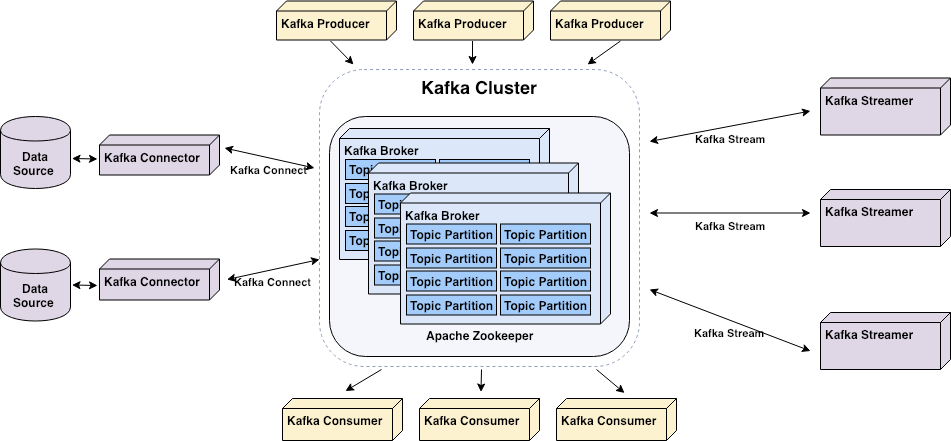

#II. Envirement preparation

Requirements


*   Your local environment must have Java 8+ installed.
*   Download and install zookeeper
*   Download and install Kafka
*   Download and install zookeeper
*   Configuration of Kafka clustrer



In [ ]:
#Your local environment must have Java 8+ installed.
!java -version

openjdk version "11.0.23" 2024-04-16
OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1)
OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"

In [ ]:
##Download and install zookeeper
#!wget https://dlcdn.apache.org/zookeeper/zookeeper-3.8.1/apache-zookeeper-3.8.1-bin.tar.gz



--2024-06-09 16:18:40--  https://downloads.apache.org/kafka/3.7.0/kafka-3.7.0-src.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.208.237, 135.181.214.104, 2a01:4f8:10a:39da::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.208.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12287816 (12M) [application/x-gzip]
Saving to: ‘kafka-3.7.0-src.tgz’

kafka-3.7.0-src.tgz 100%[===================>]  11.72M  10.5MB/s    in 1.1s    

2024-06-09 16:18:42 (10.5 MB/s) - ‘kafka-3.7.0-src.tgz’ saved [12287816/12287816]



In [ ]:
#!ls -lh apache-zookeeper-3.8.4-bin.tar.gz

-rw-r--r-- 1 root root 21K Jun  9 15:59 apache-zookeeper-3.8.4-bin.tar.gz


In [ ]:
#!tar -xzvf apache-zookeeper-3.8.1-bin.tar.gz
#!tar -xzvf apache-zookeeper-3.8.4-bin.tar.gz


gzip: stdin: not in gzip format
tar: Child returned status 1
tar: Error is not recoverable: exiting now


In [ ]:
#Download and install Kafka

#!wget https://dlcdn.apache.org/kafka/3.4.1/kafka_2.13-3.4.1.tgz
! wget https://downloads.apache.org/kafka/3.7.0/kafka-3.7.0-src.tgz


--2024-06-09 16:19:31--  https://downloads.apache.org/kafka/3.7.0/kafka-3.7.0-src.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.208.237, 135.181.214.104, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.208.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12287816 (12M) [application/x-gzip]
Saving to: ‘kafka-3.7.0-src.tgz’

kafka-3.7.0-src.tgz 100%[===================>]  11.72M  12.0MB/s    in 1.0s    

2024-06-09 16:19:32 (12.0 MB/s) - ‘kafka-3.7.0-src.tgz’ saved [12287816/12287816]



In [ ]:
#!tar -xzf kafka_2.13-3.4.1.tgz
!tar -xzf kafka-3.7.0-src.tgz

In [ ]:
# To start ZooKeeper you need a configuration file.
# copy content from <kafka install>/config/zookeeper.properties to  <zookeeper install>conf/zoo.cfg and :
# tickTime=2000
# dataDir=/var/lib/zookeeper
# clientPort=2181



# Start the ZooKeeper service
#!apache-zookeeper-3.8.1-bin/bin/zkServer.sh start


ZooKeeper JMX enabled by default
Using config: /content/apache-zookeeper-3.8.1-bin/bin/../conf/zoo.cfg
Starting zookeeper ... STARTED


In [ ]:
!wget https://services.gradle.org/distributions/gradle-8.5-bin.zip
!unzip gradle-8.5-bin.zip
!export PATH=$PATH:$PWD/gradle-8.5/bin

--2024-06-09 16:29:44--  https://services.gradle.org/distributions/gradle-8.5-bin.zip
Resolving services.gradle.org (services.gradle.org)... 104.16.73.101, 104.16.72.101, 2606:4700::6810:4865, ...
Connecting to services.gradle.org (services.gradle.org)|104.16.73.101|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/gradle/gradle-distributions/releases/download/v8.5.0/gradle-8.5-bin.zip [following]
--2024-06-09 16:29:44--  https://github.com/gradle/gradle-distributions/releases/download/v8.5.0/gradle-8.5-bin.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/696192900/dcd9afce-797b-4c7f-9704-6decd18882ea?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20240609%2Fus-east-1%2Fs3%2Faws4_request&X-A

In [ ]:
%cd kafka-3.7.0-src

/content/kafka-3.7.0-src


In [ ]:
!./gradlew jar -PscalaVersion=2.13.12

Starting a Gradle Daemon, 1 incompatible Daemon could not be reused, use --status for details


> Starting Daemon> IDLE<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING s]<-------------> 0% INITIALIZING [1s]> Evaluating settings<-------------> 0% INITIALIZING [2s]> Evaluating settings > Compiling settings file 'settings.gradle'<-------------> 0% INITIALIZING [3s]<-------------> 0% INITIALIZING [4s]> Evaluating settings> Evaluating settings > Resolve dependencies of detachedConfiguration1<-------------> 0% INITIALIZING [5s]> Evaluating settings > Resolve dependencies of detachedConfiguration1 > com.gr<-------------> 0% INITIALIZING [6s]> Evaluating settings > Resolve dependencies of detachedConfiguration

In [ ]:
!bin/zookeeper-server-start.sh config/zookeeper.properties

kafka-3.7.0-src/./gradlew


In [ ]:
#verify that zookeeper server is running correctly
#!apache-zookeeper-3.8.1-bin/bin/zkServer.sh status

ZooKeeper JMX enabled by default
Using config: /content/apache-zookeeper-3.8.1-bin/bin/../conf/zoo.cfg
Client port found: 2181. Client address: localhost. Client SSL: false.
Mode: standalone


In [ ]:
#Start the Kafka server
!kafka_2.13-3.4.1/bin/kafka-server-start.sh -daemon kafka_2.13-3.4.1/config/server.properties &

# Start the Kafka broker service
#import os
#os.system("!sudo kafka_2.13-3.4.0/bin/kafka-server-start.sh &")
#os.system("!kafka_2.13-3.4.0/bin/kafka-server-start.sh kafka_2.13-3.4.0/config/server.properties ")
#By default Apache Kafka will run on port 9092 and Apache Zookeeper will run on port 2181.

In [ ]:
#verify that kafka server is running correctly
!kafka_2.13-3.4.1/bin/kafka-topics.sh --list --bootstrap-server localhost:9092


finance
topic1


#III. Basic Example

kafka-python is a python client for the Apache Kafka. it is designed to function much like the official java client, with a sprinkling of pythonic interfaces (e.g., consumer iterators).


In [ ]:
!pip install kafka-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 6.4 MB/s eta 0:00:00


Below is a simple example of a data pipeline where a producer sends data to a topic and a consumer continuously receives the stream of records from the topic.

Define producer.py  and consumer.py then execute them with the command below.

In [ ]:
!python producer.py & python consumer.py &

###########
##Producer#
###########
#
#data=["message1","message2", "message1 and message2", "message1 and message2 and message3"]
#from typing_extensions import dataclass_transform
#from kafka import KafkaProducer
#topic="topic1"
#producer = KafkaProducer(bootstrap_servers='localhost:9092')
#for d in data:
#  future=producer.send(topic, bytes(d, 'utf-8'))
#  # Block until a single message is sent (or timeout)
#  result = future.get(timeout=60)
#
###########
##Consumer#
###########
#from kafka import KafkaConsumer
#consumer = KafkaConsumer('topic1')
#for msg in consumer:
#  print (msg)

Traceback (most recent call last):
  File "/content/consumer.py", line 5, in <module>
    consumer = KafkaConsumer('topic1')
  File "/usr/local/lib/python3.10/dist-packages/kafka/consumer/group.py", line 356, in __init__
    self._client = KafkaClient(metrics=self._metrics, **self.config)
  File "/usr/local/lib/python3.10/dist-packages/kafka/client_async.py", line 244, in __init__
    self.config['api_version'] = self.check_version(timeout=check_timeout)
  File "/usr/local/lib/python3.10/dist-packages/kafka/client_async.py", line 900, in check_version
    raise Errors.NoBrokersAvailable()
kafka.errors.NoBrokersAvailable: NoBrokersAvailable
Traceback (most recent call last):
  File "/content/producer.py", line 10, in <module>
    producer = KafkaProducer(bootstrap_servers='localhost:9092')
  File "/usr/local/lib/python3.10/dist-packages/kafka/producer/kafka.py", line 381, in __init__
    client = KafkaClient(metrics=self._metrics, metric_group_prefix='producer',
  File "/usr/local/lib/p

Below another example with a spark consumer. The Kafka client get data from the topic and produce a word count output while there are new records received in the topic.

Define kafkaconsumer.py then execute them with the command below.

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=95d3f1320c2aa1c2ebfd0f7ba701ae95b2daf608442eb9e4ad21d82a66ad5b0e
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
!python producer.py & python kafkaconsumer.py &

# ##########
# #Producer#
# ##########
# import time
# data=["message1","message2", "message1 and message2", "message1 and message2 and message3"]
# from typing_extensions import dataclass_transform
# from kafka import KafkaProducer
# topic="topic1"
# producer = KafkaProducer(bootstrap_servers='localhost:9092')
# for d in data:
#   time.sleep(30). #<===========
#   future=producer.send(topic, bytes(d, 'utf-8'))
#   # Block until a single message is sent (or timeout)
#   result = future.get(timeout=60)


# ##################
# #Kafka Consumer#
# ##################
# add Spark dependencies
# import os
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-streaming-kafka-0-10_2.12:3.4.0,org.apache.spark:spark-sql-kafka-0-10_2.12:3.4.0 pyspark-shell'

# """
#  Consumes messages from one or more topics in Kafka and does wordcount.
#    <bootstrap-servers> The Kafka "bootstrap.servers" configuration. A
#    comma-separated list of host:port.

#    <subscribe-type> There are three kinds of type, i.e. 'assign', 'subscribe',
#    'subscribePattern'.
#    |- <assign> Specific TopicPartitions to consume. Json string
#    |  {"topicA":[0,1],"topicB":[2,4]}.
#    |- <subscribe> The topic list to subscribe. A comma-separated list of
#    |  topics.
#    |- <subscribePattern> The pattern used to subscribe to topic(s).
#    |  Java regex string.
#    |- Only one of "assign, "subscribe" or "subscribePattern" options can be
#    |  specified for Kafka source.

#    <topics> Different value format depends on the value of 'subscribe-type'.
#  Run the example
#     `$ bin/spark-submit examples/src/main/python/sql/streaming/structured_kafka_wordcount.py \
#     host1:port1,host2:port2 subscribe topic1,topic2`
# """
# import sys

# from pyspark.sql import SparkSession
# from pyspark.sql.functions import explode
# from pyspark.sql.functions import split


# bootstrapServers ="localhost:9092"
# subscribeType = "subscribe"
# topics = "topic1"

# spark = SparkSession\
#     .builder\
#     .appName("StructuredKafkaWordCount")\
#     .getOrCreate()

# # Create DataSet representing the stream of input lines from kafka
# lines = spark\
#     .readStream\
#     .format("kafka")\
#     .option("kafka.bootstrap.servers", bootstrapServers)\
#     .option(subscribeType, topics)\
#     .load()\
#     .selectExpr("CAST(value AS STRING)")

# # Split the lines into words
# words = lines.select(
#     # explode turns each item in an array into a separate row
#     explode(
#         split(lines.value, ' ')
#     ).alias('word')
# )

# # Generate running word count
# wordCounts = words.groupBy('word').count()

# # Start running the query that prints the running counts to the console
# query = wordCounts\
#     .writeStream\
#     .outputMode('complete')\
#     .format('console')\
#     .start()

# query.awaitTermination()


:: loading settings :: url = jar:file:/usr/local/lib/python3.10/dist-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml
Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
org.apache.spark#spark-streaming-kafka-0-10_2.12 added as a dependency
org.apache.spark#spark-sql-kafka-0-10_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-75c1909b-a37e-4ab2-8b73-852b98fb24eb;1.0
	confs: [default]
	found org.apache.spark#spark-streaming-kafka-0-10_2.12;3.4.0 in central
	found org.apache.spark#spark-token-provider-kafka-0-10_2.12;3.4.0 in central
	found org.apache.kafka#kafka-clients;3.3.2 in central
	found org.lz4#lz4-java;1.8.0 in central
	found org.xerial.snappy#snappy-java;1.1.9.1 in central
	found org.slf4j#slf4j-api;2.0.6 in central
	found org.apache.hadoop#hadoop-client-runtime;3.3.4 in central
	found org.apache.hadoop#hadoop-client-api;3.3.4 in central
	found commons-logg

#III. Application: Realtime Processing of News


Based on (Spark, Kafka, HDFS), define clearly  a data processing pipeline for a subject of your choice (Topic Detection, sentiment analysis...)



*   Choose some  data sources for news
*   Define the producers
  *   one producer per source (each producer injects data into all topics)
  *   or one producer per topic (each producer connects to all sources)
   *      define a kafka consumer to display the processing results

In [ ]:
!pip install GoogleNews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 6.3 MB/s eta 0:00:00


In [ ]:
# Install PySpark and Spark NLP
! pip install -q pyspark==3.3.0 spark-nlp==4.2.8

# Install Spark NLP Display lib
! pip install --upgrade -q spark-nlp-display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.8/453.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.0 MB/s eta 0:00:00


In [ ]:
import sparknlp
import pyspark.sql.functions as F
from pyspark.ml.feature import *
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from sparknlp.annotator import *
from sparknlp.base import *
from sparknlp.pretrained import PretrainedPipeline
from pyspark.sql.types import StringType, IntegerType
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import accuracy_score

In [ ]:
document = DocumentAssembler()\
    .setInputCol("Sentence")\
    .setOutputCol("document")

embeddings = BertSentenceEmbeddings\
    .pretrained('sent_bert_wiki_books_sst2', 'en') \
    .setInputCols(["document"])\
    .setOutputCol("sentence_embeddings")

sentimentClassifier = ClassifierDLModel.pretrained("classifierdl_bertwiki_finance_sentiment", "en") \
  .setInputCols(["sentence_embeddings"]) \
  .setOutputCol("probabilities")

finisher = Finisher() \
    .setInputCols(["probabilities"]) \
    .setOutputCols("final_sentiment") \
    .setOutputAsArray(True)

In [ ]:
!python financeProducer.py & python FinanceConsumer.py &

10
:: loading settings :: url = jar:file:/usr/local/lib/python3.10/dist-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml
Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-ea804789-dc04-43bf-aaf7-7d73a4e8c690;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;4.2.8 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.828 in central
	found com.github.universal-automata#liblevenshtein;3.0.0 in central
	found com.google.protobuf#protobuf-java-util;3.0.0-beta-3 in central
	found com.google.protobuf#protobuf-java;3.0.0-beta-3 in central
	found com.google.code.gson#gson;2.3 in central
	found it.unimi.dsi#fastutil;7.0.12 in central
	found org.projectlombok#lombok;1.16.8 in central
	fo

KeyboardInterrupt: ignored

In [ ]:
!python financeProducer.py & python FinanceConsumer.py &

10
:: loading settings :: url = jar:file:/usr/local/lib/python3.10/dist-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml
Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-77c643f6-276a-4d9e-879e-6ace3cc21a9c;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;4.2.8 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.828 in central
	found com.github.universal-automata#liblevenshtein;3.0.0 in central
	found com.google.protobuf#protobuf-java-util;3.0.0-beta-3 in central
	found com.google.protobuf#protobuf-java;3.0.0-beta-3 in central
	found com.google.code.gson#gson;2.3 in central
	found it.unimi.dsi#fastutil;7.0.12 in central
	found org.projectlombok#lombok;1.16.8 in central
	fo

KeyboardInterrupt: ignored

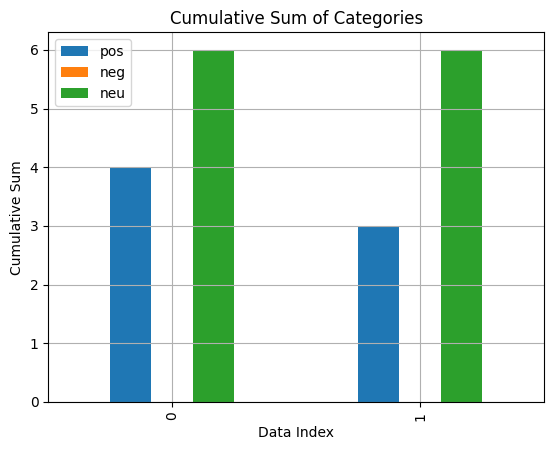

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_p = pd.read_csv("plot2.csv")

df_p.drop("Unnamed: 0",axis = 1,inplace=True)
df_p.plot(kind="bar")

# Paramètres du graphique
plt.xlabel("Data Index")
plt.ylabel("Cumulative Sum")
plt.title("Cumulative Sum of Sentiment of google stock")
plt.grid(True)
# Affichage du graphique
plt.show()